# Classification and Analysis of Termination Status using Human Resource Data

The purpose of this project is to practice data exploration and supervised machine learning methods using human resources data. The target feature of this analysis is termination (Termd), which represents if an employee has been terminated. The following sections will be used to understand this feature and how it relates to others within the data and to develop and evaluate a classification model to predict whether an employee has been terminated.  

### Imported Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

#Classification Methods
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Data

This is a synthetic HR-related dataset created by Dr. Carla Patalona and Dr. Rich Huebner as an educational tool for human resources students and others interested analytics, machine learning, and data visualization. The data contains 311 observations and 36 features. Further information about this dataset, including descriptions of features can be found here: 
https://rpubs.com/rhuebner/hrd_cb_v14

In [2]:
#Reading in the dataset
data= pd.read_csv('HRDataset_v14.csv')
data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


### Data Exploration

In [3]:
#Evaluating the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

There are several things to note about the data here:

1) There are a couple features, Date of Termination and Manager ID, that have missing data. This will require a closer look and needs to be addressed before use in any analysis.

2) There are several categorical features in the dataset that are also encoded to a numerical representation in another feature. This redundancy must be accounted for in the analysis. Additionally, some of these categorical features must be transformed using dummy variables to be included within a regression analysis.

3) The data includes some features that are unique identifiers. These features can be disregarded as trivial for the purpose of analysis.

4) DOB, Date of Hire, and Date of Termination may be transformed to numerical values for use in analysis.

5) Because the target variable is Termd (termination), the features EmpStatusID, DateofTermination, TermReason, EmploymentStatus, and any features that may be derived from these cannot be used in a predictive regression analysis as they are perfectly correlated with an employee's termination status. These features do not exist if an employee has not been terminated. These features can be used in other ways to understand the context around termination status however. 

#### Handling Missing Data: Date of Termination, ManagerID

Date of Termination:

The date of termination feature appears to contain missing data. The likely explaination is that there simply is no data recorded for employees that are still employed with the company. A closer look at the data below reveals that this is indeed the case. The number of active and terminated employees match across each feature containing information about employment status. Additionally, there are no cases where there is a recorded date of termination but employment status or termination status indicates that the employee is still employed. As such, the missing data in this feature will not be addressed in any specific way.

In [4]:
#Viewing frequency tables of employment status features.
#If there is no issue with date of termination missing data, these numbers should match
print(data['EmploymentStatus'].value_counts(),'\n')
print(data['Termd'].value_counts(),'\n')
print(data['DateofTermination'].value_counts(dropna=False))

Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: EmploymentStatus, dtype: int64 

0    207
1    104
Name: Termd, dtype: int64 

NaN          207
9/7/2015       2
5/17/2016      2
11/4/2015      2
6/18/2013      2
            ... 
1/11/2014      1
5/30/2011      1
3/15/2015      1
6/25/2015      1
9/29/2015      1
Name: DateofTermination, Length: 97, dtype: int64


In [5]:
#Checking for cases with a recorded date of termination but employment status is Active
#This should yield no results
data[(data['DateofTermination'].isna()) & (data['EmploymentStatus']!='Active')][['DateofTermination','EmploymentStatus']]

,DateofTermination,EmploymentStatus


In [6]:
#Checking for cases with a recorded date of termination but termination status is 0
#This should yield no results
data[(data['DateofTermination'].isna()) & (data['Termd']!=0)][['DateofTermination','Termd']]

,DateofTermination,Termd


In [7]:
#Active employees have no recorded date of termination
data[data['DateofTermination'].isna()][['DateofTermination','EmploymentStatus','Termd']]

,DateofTermination,EmploymentStatus,Termd
0,NaN,Active,0
3,NaN,Active,0
5,NaN,Active,0
6,NaN,Active,0
7,NaN,Active,0
...,...,...,...
305,NaN,Active,0
306,NaN,Active,0
308,NaN,Active,0
309,NaN,Active,0


ManagerID:

Interestingly, for the ManagerName feature there is a recorded value for every record in the dataset, but this is not the case for ManagerID. Each manager should have a unique ID associated with their name, but this does not seem to be the case. 

In [8]:
#Viewing unique associations between ManagerName and ManagerID
data.drop_duplicates(subset=['ManagerName','ManagerID'])[['ManagerName','ManagerID']].sort_values(by=['ManagerName'])

,ManagerName,ManagerID
6,Alex Sweetwater,10.0
5,Amy Dunn,11.0
97,Board of Directors,9.0
29,Brandon R. LeBlanc,1.0
26,Brandon R. LeBlanc,3.0
8,Brannon Miller,12.0
70,Brian Champaigne,13.0
10,David Stanley,14.0
60,Debra Houlihan,15.0
3,Elijiah Gray,16.0


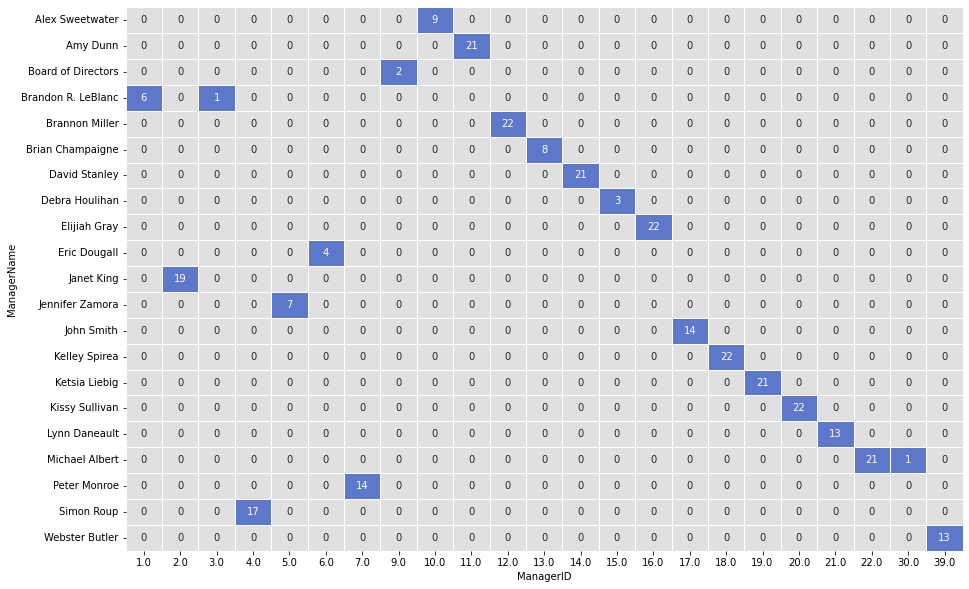

In [9]:
#Crosstab to view how manager IDs match up with manager names
pd.set_option('display.max_columns',100)

cross= pd.crosstab(data['ManagerName'],data['ManagerID'])

plt.figure(figsize=(15,10))
sns.heatmap(cross, annot=True, cmap=sns.color_palette(['#E0E0E0','#5D77CA']),center=.5,cbar=False, linewidth=.5)
plt.show()

There are several issues between the manager name and manager ID features:

1) Managers Brandon R. LeBlanc and Michael Albert are associated with more than 1 ID. In these cases, the least frequent IDs will be replaced with the most frequent ID associated with the same manager name.

2) Every manager in the dataset has at least 1 ID associated with their name and every record has a recorded manager name. This means that the missing manager ID data can be filled with the ID of the associated manager name.

Fixing Multiple Manager IDs:

In [10]:
#Correcting managers with multiple IDs
data.loc[(data['ManagerName']== 'Brandon R. LeBlanc'),'ManagerID']=1

data.loc[(data['ManagerName']== 'Michael Albert'),'ManagerID']=22

Filling in Missing Manager ID Data:

Webster Butler is the only manager with missing ID data

In [11]:
#Filling missing data
#Webster Butler was the only manager with missing ID values in the dataset
data.loc[(data['ManagerName']=='Webster Butler'),'ManagerID']= 39

Verifying Fix:

In [12]:
#Each Manager name now has a unique ID
data.drop_duplicates(subset=['ManagerName','ManagerID'])[['ManagerName','ManagerID']].sort_values(by=['ManagerName'])

,ManagerName,ManagerID
6,Alex Sweetwater,10.0
5,Amy Dunn,11.0
97,Board of Directors,9.0
26,Brandon R. LeBlanc,1.0
8,Brannon Miller,12.0
70,Brian Champaigne,13.0
10,David Stanley,14.0
60,Debra Houlihan,15.0
3,Elijiah Gray,16.0
48,Eric Dougall,6.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

#### Feature Engineering: Age, DaysatCompany

In [14]:
#Converting DOB, DateofHire, DateofTermination, and LastPerformanceReview_Date to datetimes
data['DOB']= pd.to_datetime(data['DOB'])
data['DateofHire']= pd.to_datetime(data['DateofHire'])
data['DateofTermination']= pd.to_datetime(data['DateofTermination'])
data['LastPerformanceReview_Date']= pd.to_datetime(data['LastPerformanceReview_Date'])

In [15]:
#Reviewing datetimes
data[['DOB','DateofHire','DateofTermination','LastPerformanceReview_Date']].describe(datetime_is_numeric=True)

,DOB,DateofHire,DateofTermination,LastPerformanceReview_Date
count,311,311,104,311
mean,1999-05-11 08:43:12.926045056,2013-02-03 22:50:32.797427712,2015-06-14 11:46:09.230769152,2017-09-10 21:17:56.527331072
min,1972-02-09 00:00:00,2006-01-09 00:00:00,2010-08-30 00:00:00,2010-07-14 00:00:00
25%,1979-07-15 00:00:00,2011-07-11 00:00:00,2014-01-10 12:00:00,2016-03-19 12:00:00
50%,1985-03-15 00:00:00,2013-02-18 00:00:00,2015-09-22 00:00:00,2019-01-16 00:00:00
75%,1989-09-15 00:00:00,2014-09-23 12:00:00,2016-09-08 06:00:00,2019-02-04 00:00:00
max,2071-10-23 00:00:00,2018-07-09 00:00:00,2018-11-10 00:00:00,2019-02-28 00:00:00


Couple of things to note here:

1) There is an invalid value in the DOB data. The most recent birthday is reported to be in the year 2070 which is impossible as it is in the future. Initially, this was thought to be a data entry error, but after a closer look at the data it became clear that this was a quirk in the code of the pandas datetime conversion. The original dataset recorded the year of these dates with 2 digits making them ambiguous regarding the century. Pandas to_datetime() handles this ambiguity using a cutoff value. Years <=70 are assigned to the 2000s and numbers >70 are assigned to the 1900s. This error must be corrected.

2) In order to use DOB to calculate an age there needs to a cutoff date to reference. The most recent performance review was conducted on 2/28/2019. Based on this, age will be calculated as of 3/1/2019.

3) In calculating days at company, because there is no recorded termination date for active employees, there will also be missing data in the days at company feature for these observations. Like age, this can also be addressed using an assumed cutoff date. March 1, 2019 will be the cutoff date to calculate the days at company feature as well.

Fixing Datetime Error:

In [16]:
#Function to fix the datetime error

def date_fix(x):
    
    #There are no birthdays beyond the year 2000 in the data
    if x.year > 2000:
        year= x.year - 100
        
    else:
        year= x.year
        
    date_str= '{}/{}/{}'.format(x.month,x.day,year)
    
    return pd.to_datetime(date_str)

In [17]:
#Fixing the DOB datetimes
data['DOB']= data['DOB'].apply(date_fix)

data['DOB'].describe(datetime_is_numeric=True)

count                              311
mean     1979-02-06 09:48:02.315112544
min                1951-01-02 00:00:00
25%                1973-12-03 00:00:00
50%                1980-09-30 00:00:00
75%                1986-05-29 12:00:00
max                1992-08-17 00:00:00
Name: DOB, dtype: object

Creating Age Feature:

In [18]:
#Creating the Age feature
data['Age']= pd.to_datetime('3/1/2019') - data['DOB']
data['Age']= data['Age'] / np.timedelta64(1,'Y')
data['Age']= data['Age'].astype('int')
data['Age']

0      35
1      43
2      30
3      30
4      29
       ..
306    33
307    36
308    39
309    40
310    40
Name: Age, Length: 311, dtype: int32

Creating Days at Company Feature:

In [19]:
#Creating the DaysatCompany feature
data['DaysatCompany']= data['DateofTermination'] - data['DateofHire']
data['DaysatCompany']= data['DaysatCompany'] / np.timedelta64(1,'D')

#Filling missing data for days at company using Jan. 1
data.loc[(data['DaysatCompany'].isna()),'DaysatCompany']= (pd.to_datetime('3/1/2019') - data.loc[(data['DaysatCompany'].isna()),'DateofHire']) / np.timedelta64(1,'D')

data['DaysatCompany']

0      2796.0
1       444.0
2       447.0
3      4071.0
4      1884.0
        ...  
306    1698.0
307    2583.0
308    3247.0
309    1432.0
310    1614.0
Name: DaysatCompany, Length: 311, dtype: float64

#### Exploring Data Centers

In [20]:
#Evaluating the centers of numerical features
data[['Salary','EngagementSurvey','EmpSatisfaction','SpecialProjectsCount','DaysLateLast30','Absences','Age','DaysatCompany']].describe()

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,DaysatCompany
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,69020.684887,4.110000,3.890675,1.218650,0.414791,10.237942,39.527331,1762.758842
std,25156.636930,0.789938,0.909241,2.349421,1.294519,5.852596,8.929747,801.338427
min,45046.000000,1.120000,1.000000,0.000000,0.000000,1.000000,26.000000,26.000000
25%,55501.500000,3.690000,3.000000,0.000000,0.000000,5.000000,32.000000,1356.000000
50%,62810.000000,4.280000,4.000000,0.000000,0.000000,10.000000,38.000000,1698.000000
75%,72036.000000,4.700000,5.000000,0.000000,0.000000,15.000000,45.000000,2281.000000
max,250000.000000,5.000000,5.000000,8.000000,6.000000,20.000000,68.000000,4799.000000


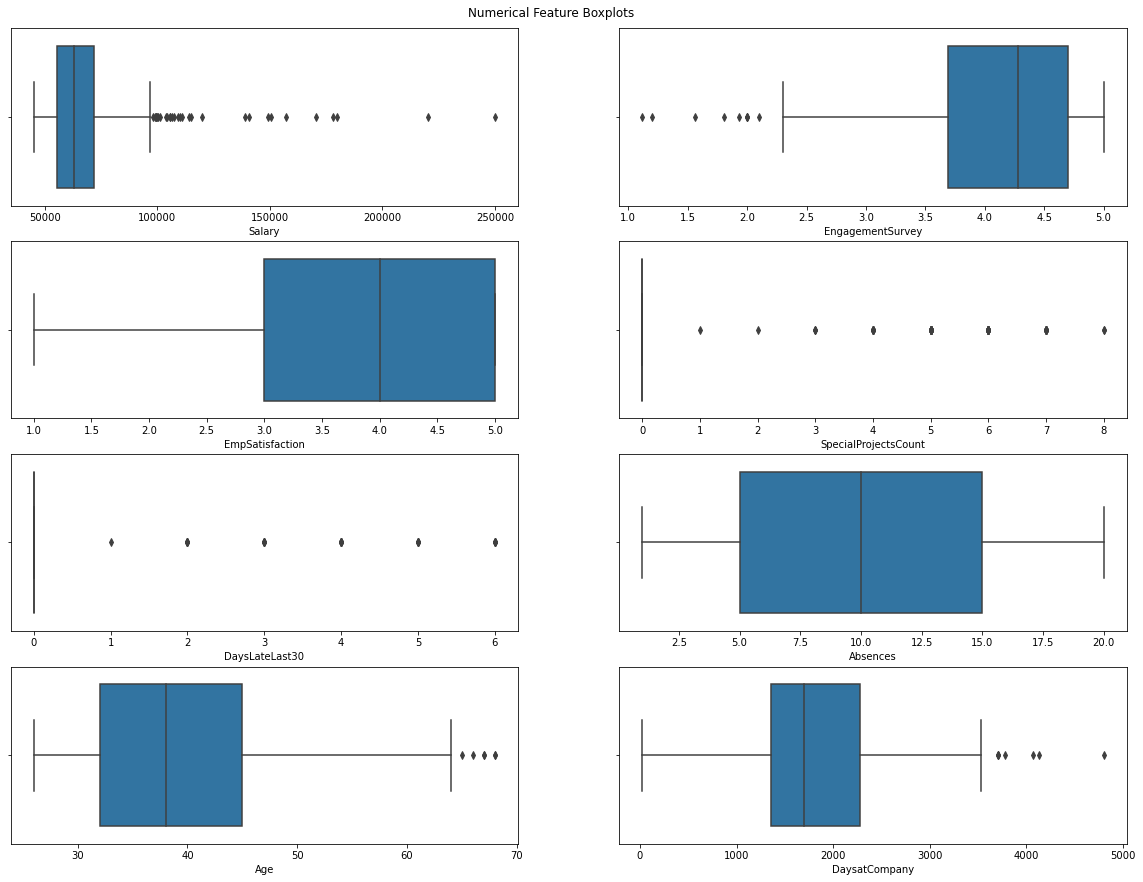

In [21]:
#Visualizing feature distributions
fig1, axes = plt.subplots(4,2, figsize=(20,15))
axes= axes.flatten()

index= 0

n_data= data[['Salary','EngagementSurvey','EmpSatisfaction','SpecialProjectsCount','DaysLateLast30','Absences','Age','DaysatCompany']]
for k, v in n_data.items():
    sns.boxplot(data= n_data, x= k, ax= axes[index])
    index += 1

plt.suptitle('Numerical Feature Boxplots',y=.9)
plt.show()

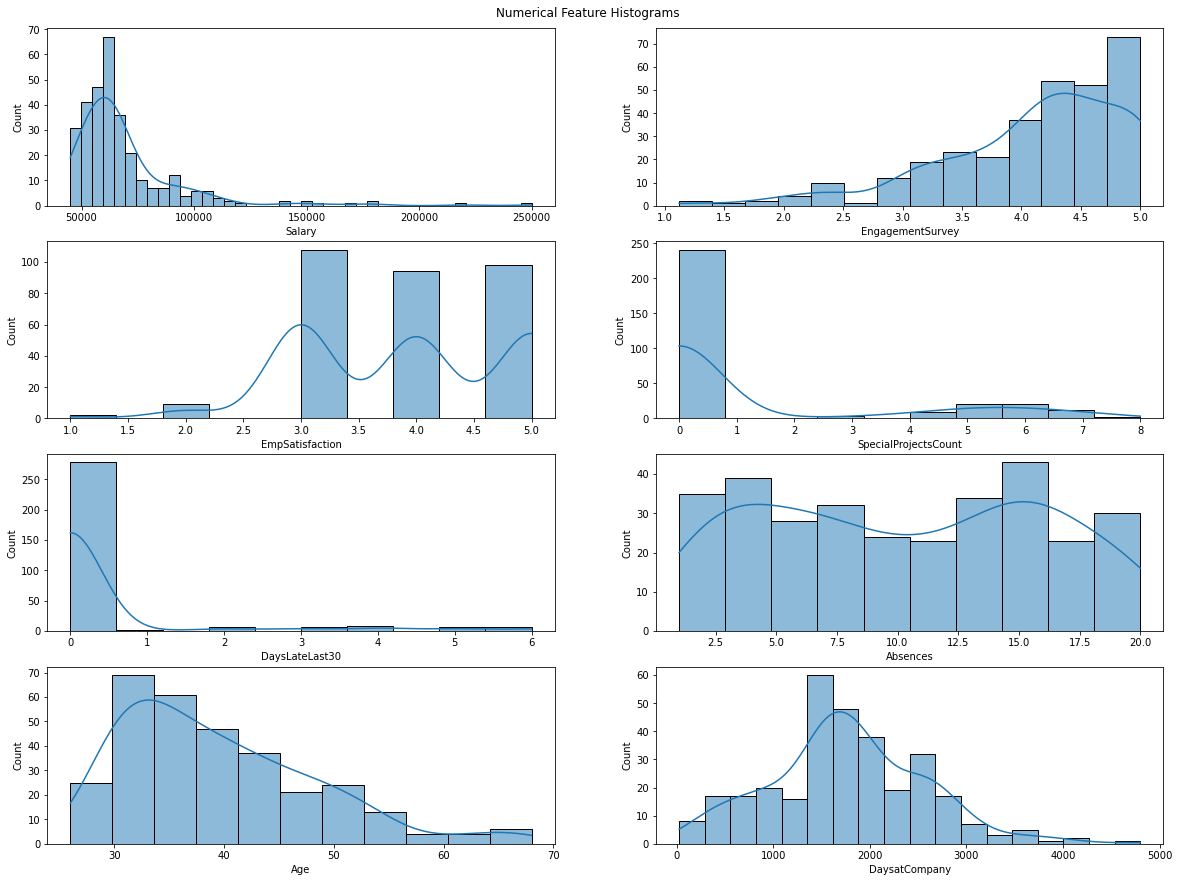

In [22]:
#Visualizing feature distributions
fig1a, axes = plt.subplots(4,2, figsize=(20,15))
axes= axes.flatten()

index= 0

n_data= data[['Salary','EngagementSurvey','EmpSatisfaction','SpecialProjectsCount','DaysLateLast30','Absences','Age','DaysatCompany']]
for k, v in n_data.items():
    sns.histplot(data= n_data, x= v, ax= axes[index], kde= True)
    index += 1

plt.suptitle('Numerical Feature Histograms',y=.9)
plt.show()

#### Exploring Categorical Features

In [23]:
#Viewing Frequency of categorical data
cats= ['MarriedID','FromDiversityJobFairID','Termd','Position','State','Zip','Sex','MaritalDesc','CitizenDesc','HispanicLatino',
      'RaceDesc','TermReason','EmploymentStatus','Department','ManagerName','RecruitmentSource','PerformanceScore']

data[cats].astype('object').describe()

,MarriedID,FromDiversityJobFairID,Termd,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore
count,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311
unique,2,2,2,32,28,158,2,5,3,4,6,18,3,6,21,9,4
top,0,0,0,Production Technician I,MA,1886,F,Single,US Citizen,No,White,N/A-StillEmployed,Active,Production,Michael Albert,Indeed,Fully Meets
freq,187,282,207,137,276,13,176,137,295,282,187,207,207,209,22,87,243


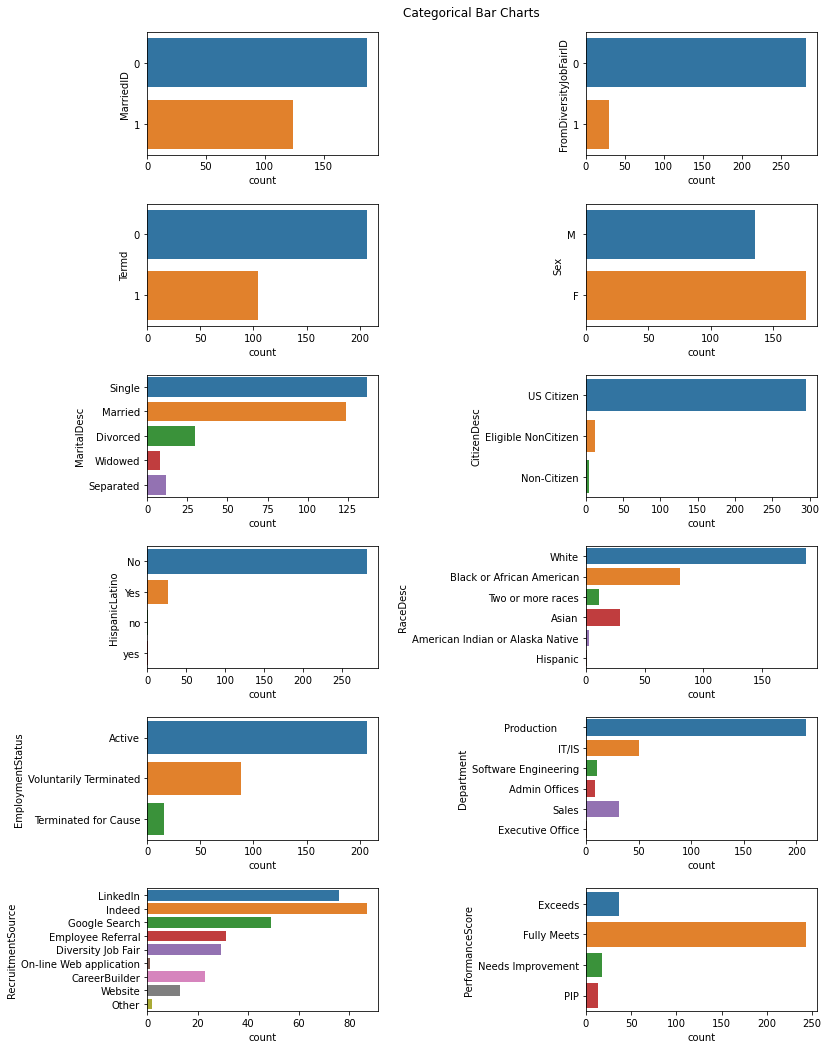

In [24]:
#Visualizing categorical features
fig2, axes2 = plt.subplots(6,2, figsize=(12,18))
axes2= axes2.flatten()

c_data= data[['MarriedID','FromDiversityJobFairID','Termd','Sex','MaritalDesc','CitizenDesc','HispanicLatino',
      'RaceDesc','EmploymentStatus','Department','RecruitmentSource','PerformanceScore']]

index= 0

for k, v in c_data.items():
    sns.countplot(data= c_data, y= k, ax= axes2[index])
    index += 1

plt.subplots_adjust(hspace= .4,wspace=.9)
plt.suptitle('Categorical Bar Charts',y=.9)
plt.show()

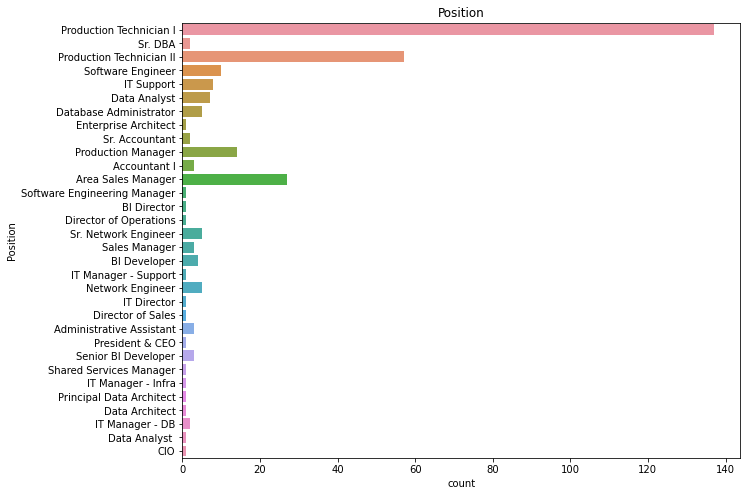

In [25]:
#Frequency Table: Position
plt.figure(figsize=(10,8))
sns.countplot(data= data, y='Position')
plt.title('Position')
plt.show()

In [26]:
#Data Analyst appears twice in this feature which is incorrect. One of the recorded values includes and extra space
#Fixing Data Analyst Value
data.loc[(data['Position']== 'Data Analyst '),'Position']= 'Data Analyst'

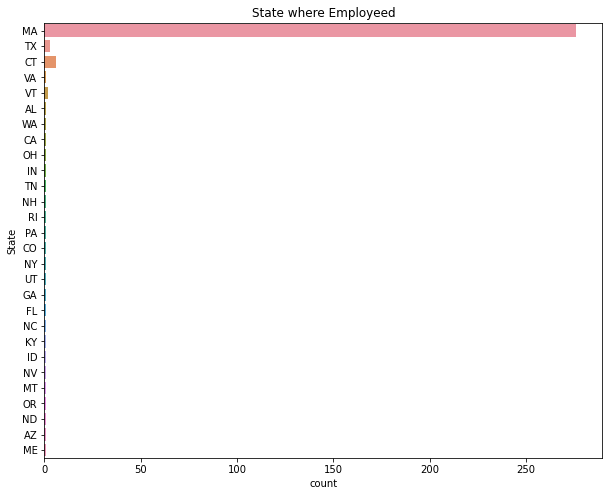

In [27]:
#Frequency Table: State
plt.figure(figsize=(10,8))
sns.countplot(data= data, y='State')
plt.title('State where Employeed')
plt.show()

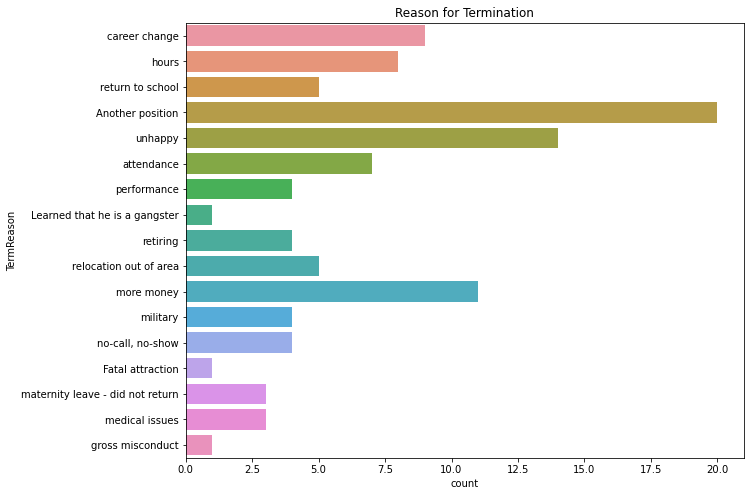

In [28]:
#Frequency Table: Termination Reason
plt.figure(figsize=(10,8))
sns.countplot(data= data.loc[(data['Termd']==1)], y='TermReason')
plt.title('Reason for Termination')
plt.show()

#### Exploring Target Feature: Termd (Termination)

In [29]:
#Frequency Table for termination
data['Termd'].value_counts()

0    207
1    104
Name: Termd, dtype: int64

Splitting the Data on Termination Status

In [30]:
#Terminated Employees
data_term= data.loc[(data['Termd']==1)]

In [31]:
#Active Employee Data
data_act= data.loc[(data['Termd']==0)]

Comparing Numerical Feature Centers

In [32]:
#Numerical Centers: Terminated Employees
#Evaluating the centers of numerical features
data_term[['Salary','EngagementSurvey','EmpSatisfaction','SpecialProjectsCount','DaysLateLast30','Absences','Age','DaysatCompany']].describe()

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,DaysatCompany
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,65690.076923,4.090481,3.884615,0.730769,0.663462,11.048077,40.817308,1264.173077
std,18679.799457,0.810150,0.862461,1.849853,1.646477,5.808230,9.790787,736.135533
min,45115.000000,2.000000,2.000000,0.000000,0.000000,1.000000,27.000000,26.000000
25%,53546.000000,3.585000,3.000000,0.000000,0.000000,6.000000,33.000000,623.000000
50%,60547.000000,4.220000,4.000000,0.000000,0.000000,11.000000,39.000000,1243.000000
75%,70267.000000,4.715000,5.000000,0.000000,0.000000,16.000000,46.000000,1804.750000
max,148999.000000,5.000000,5.000000,7.000000,6.000000,20.000000,68.000000,3493.000000


In [33]:
#Numerical Centers: Active Employees
#Evaluating the centers of numerical features
data_act[['Salary','EngagementSurvey','EmpSatisfaction','SpecialProjectsCount','DaysLateLast30','Absences','Age','DaysatCompany']].describe()

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,DaysatCompany
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,70694.033816,4.119807,3.893720,1.463768,0.289855,9.830918,38.879227,2013.256039
std,27739.416425,0.781390,0.933887,2.532774,1.058045,5.846367,8.414614,711.920135
min,45046.000000,1.120000,1.000000,0.000000,0.000000,1.000000,26.000000,235.000000
25%,56593.000000,3.730000,3.000000,0.000000,0.000000,4.000000,32.000000,1572.000000
50%,63051.000000,4.290000,4.000000,0.000000,0.000000,10.000000,37.000000,1936.000000
75%,72816.000000,4.670000,5.000000,3.000000,0.000000,15.000000,44.000000,2524.000000
max,250000.000000,5.000000,5.000000,8.000000,6.000000,20.000000,68.000000,4799.000000


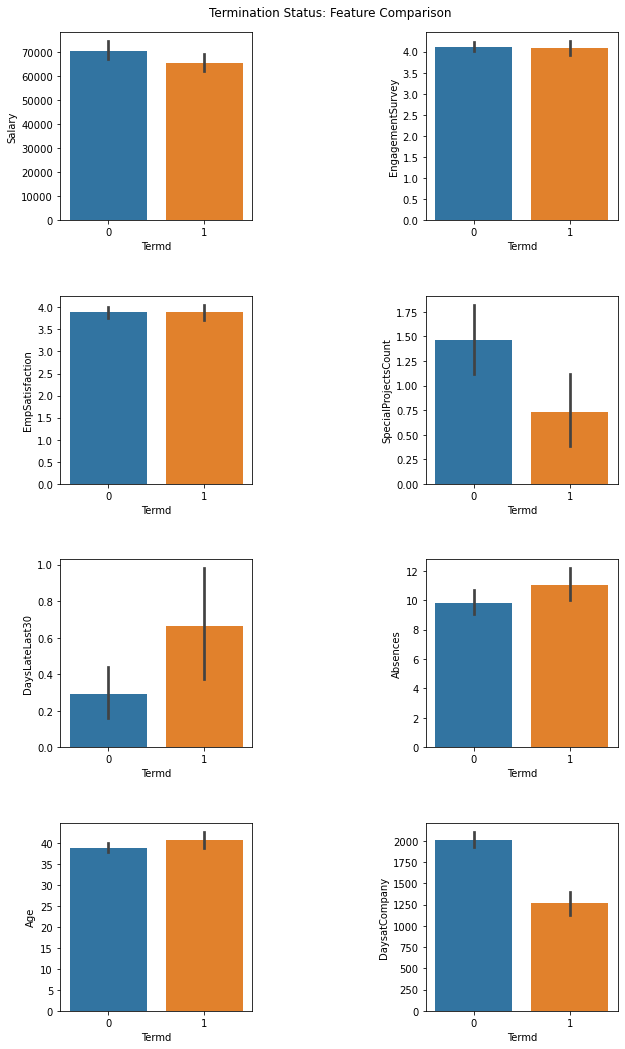

In [34]:
#Visualizing numerical variable centers on Termd
fig3, axes = plt.subplots(4,2, figsize=(10,18))
axes= axes.flatten()

index= 0

n_data= data[['Termd','Salary','EngagementSurvey','EmpSatisfaction','SpecialProjectsCount','DaysLateLast30','Absences','Age','DaysatCompany']]
for k, v in n_data.iloc[:,1:].items():
    sns.barplot(data= n_data, x='Termd', y= k, ax= axes[index])
    index += 1

plt.subplots_adjust(hspace= .4,wspace=.9)
plt.suptitle('Termination Status: Feature Comparison',y=.9)
plt.show()

After viewing termination status in relation to the numerical features in the data, there are a few take-aways:

1) Terminated employees on average have lower salaries

2) Terminated employees on average have fewer special projects

3) Terminated employees on average record more days late days

4) Terminated employees on average record more absences

5) Terminated employees on average are slightly older

6) Terminated employees on average are employeed at the company for fewer days, this may be a trivial distinction in some contexts. It is reasonable to expect that terminated employees have shorter tenures than active employees when the dates of hire are more or less the same.  

Comparing Categorical Counts:

The following tables show the frequency of certain feature values split by termination status as a proportion of all of the values of the same status (Termd- 0 for active employees or Termd- 1 for terminated employees). The total proportion of each value relative to all of the data (both Termd = 0 and Termd = 1) is recorded under the 'All' column. No significant difference between values across the termination status columns or 'All' column suggests no difference between active and terminated employees with respect to the specific feature being evaluated.  

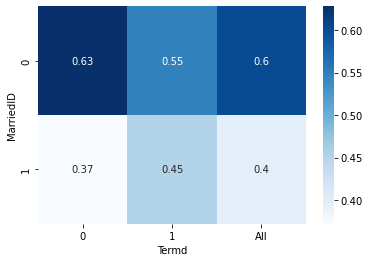

In [35]:
#MarriedID
cross=pd.crosstab(data['MarriedID'],data['Termd'],normalize='columns',margins=True)
sns.heatmap(cross,annot=True,cmap='Blues')
plt.show()

There is a significantly higher proportion of terminated employees that are married.

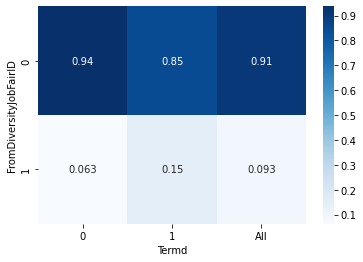

In [36]:
#Diversity Job Fair by Termination status
cross=pd.crosstab(data['FromDiversityJobFairID'],data['Termd'],normalize='columns',margins=True)
sns.heatmap(cross,annot=True,cmap='Blues')
plt.show()

A larger proportion of terminated employees were sourced from a diversity fair than for the active employees. This indicates that whether an employee was sourced from a diversity fair may be a useful predictor for termination status.

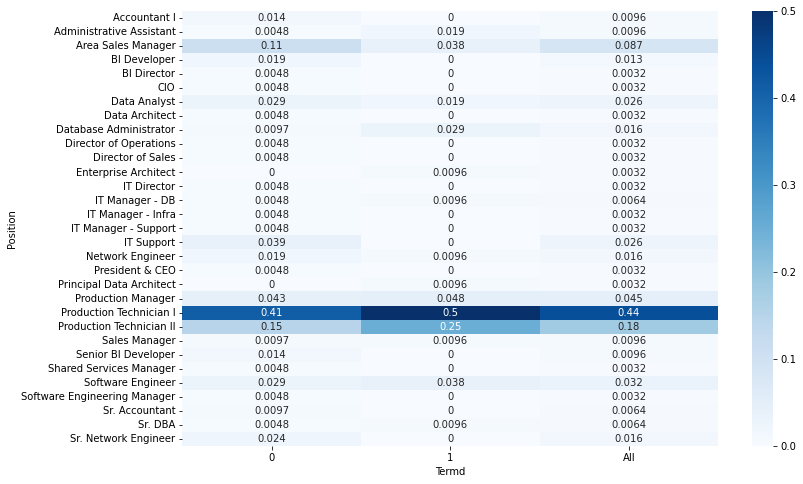

In [37]:
#Position by Termination status
cross=pd.crosstab(data['Position'],data['Termd'],normalize='columns',margins=True)
plt.figure(figsize=(12,8))
sns.heatmap(cross,annot=True,cmap='Blues')
plt.show()

Here there are several job positions that appear to be more likely indicators of termination status. The most noticable discrepancies between terminated and active employees are in the production technician positions, database administrators, and area sales managers. Much larger proportion of Production Technicians are terminated than other postions. A slightly higher proportion of database administrators were terminated. Area sales managers represented a much lower proportion of terminated employees than active employees.

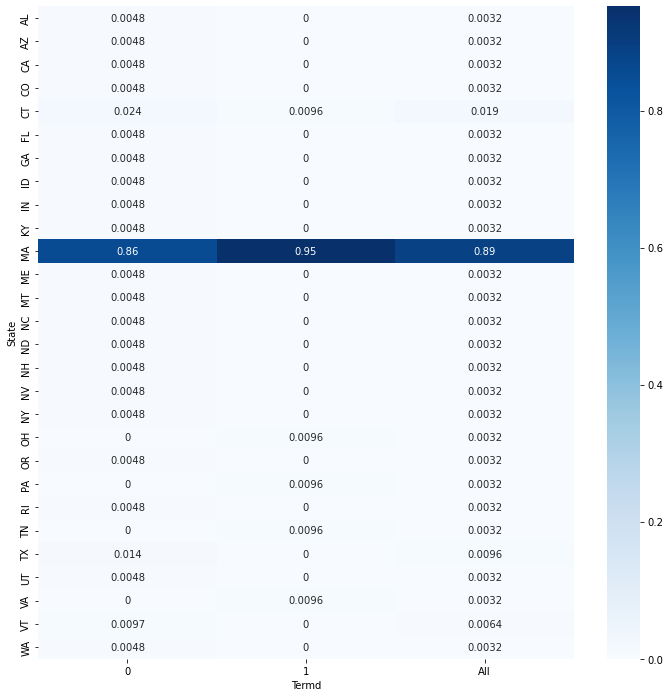

In [38]:
#State by Termination status
cross=pd.crosstab(data['State'],data['Termd'],normalize='columns',margins=True)
plt.figure(figsize=(12,12))
sns.heatmap(cross,annot=True,cmap='Blues')
plt.show()

The data shows a much larger proportion of terminated employees are based in Massachusetts, however this is likely a trivial distinction given that there are so few records from other states. ~90% of the data comes from MA.

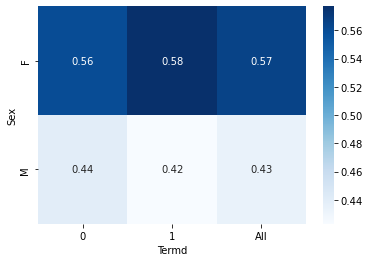

In [39]:
#Sex by Termination status
cross=pd.crosstab(data['Sex'],data['Termd'],normalize='columns',margins=True)
sns.heatmap(cross,annot=True,cmap='Blues')
plt.show()

There is only a slight difference between termination status groups based on sex. Woman make up a slightly higher proportion of terminated employees.

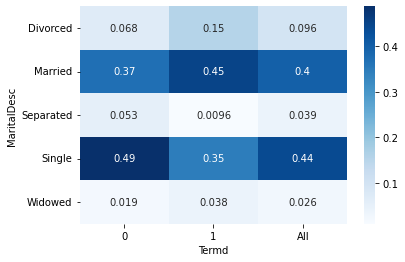

In [40]:
#Marital Description by Termination status
cross=pd.crosstab(data['MaritalDesc'],data['Termd'],normalize='columns',margins=True)
sns.heatmap(cross,annot=True,cmap='Blues')
plt.show()

Significantly higher proportions of the terminated employees are either divorced or married. There is also a slightly higher proportion who are widowed. Active employees are significantly more likely to be separated or single.

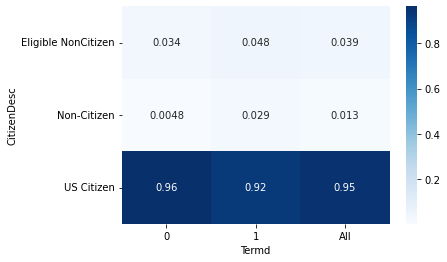

In [41]:
#CitizenDesc by Termination status
cross=pd.crosstab(data['CitizenDesc'],data['Termd'],normalize='columns',margins=True)
sns.heatmap(cross,annot=True,cmap='Blues')
plt.show()

Non-citizens make up a slightly higher proportion of the terminated individuals.

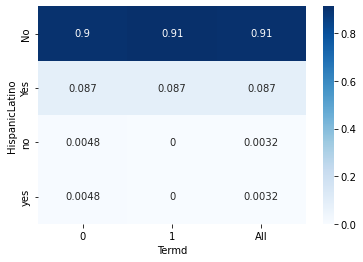

In [42]:
#HispanicLatino by Termination status
cross=pd.crosstab(data['HispanicLatino'],data['Termd'],normalize='columns',margins=True)
sns.heatmap(cross,annot=True,cmap='Blues')
plt.show()

There is no significant difference between termination status based on hispanic/latino ethinic identity.

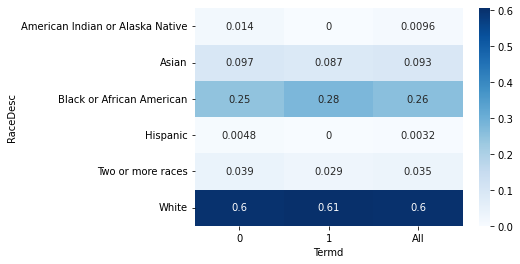

In [43]:
#Race Description by Termination status
cross=pd.crosstab(data['RaceDesc'],data['Termd'],normalize='columns',margins=True)
sns.heatmap(cross,annot=True,cmap='Blues')
plt.show()

There is a higher proportion of black, terminated employees than black, active employees. A slighly lower proportion of Asian and mixed have been terminated.

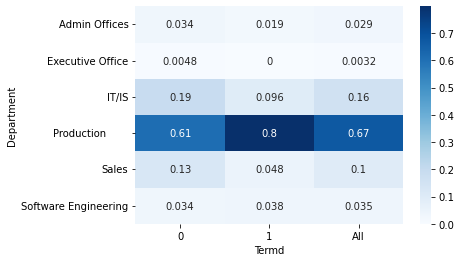

In [44]:
#Department by Termination status
cross=pd.crosstab(data['Department'],data['Termd'],normalize='columns',margins=True)
sns.heatmap(cross,annot=True,cmap='Blues')
plt.show()

A significantly smaller proportion of terminated employees worked in the Admin Offices, IT/IS, and Sales. A much larger proportion worked in Production.

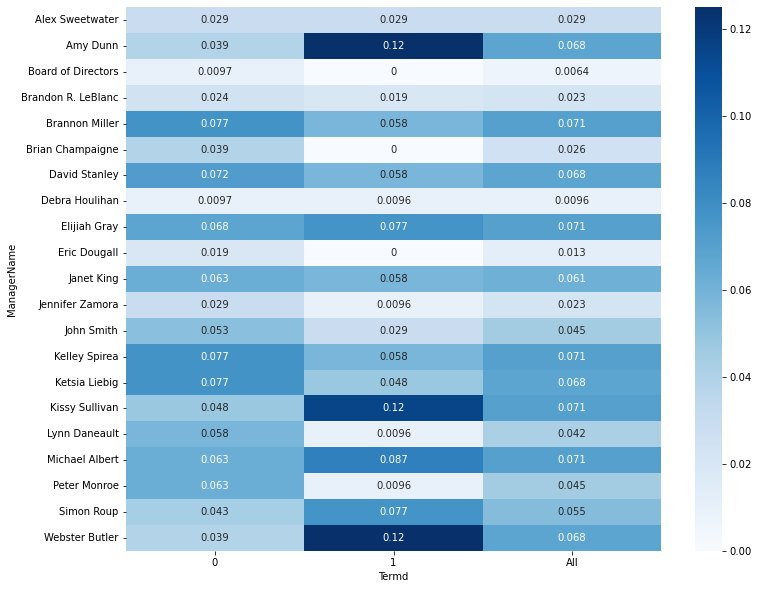

In [45]:
#Manager Name by Termination status
cross=pd.crosstab(data['ManagerName'],data['Termd'],normalize='columns',margins=True)
plt.figure(figsize=(12,10))
sns.heatmap(cross,annot=True,cmap='Blues')
plt.show()

Amy Dunn, Brannon Miller, David Stanley, Eric Dougall, Jennifer Zamora, John Smith, Kelley Spirea, Ketsia Liebig, Lynn Daneault, and Peter Monroe managed a lower proportion of the terminated employees than they do active employees. Webster Butler, Simon Roup, Michael Albert, Kissy Sullivan, and Amy Dunn all managed a significantly higher proportion of terminated employees than they did active employees. 

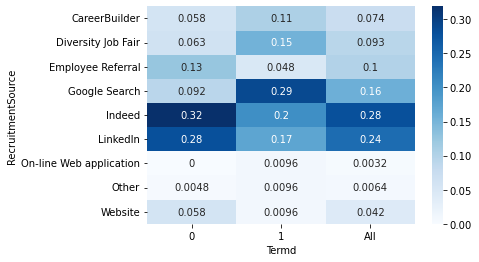

In [46]:
#Recruitment Source by Termination status
cross=pd.crosstab(data['RecruitmentSource'],data['Termd'],normalize='columns',margins=True)
sns.heatmap(cross,annot=True,cmap='Blues')
plt.show()

Significantly greater proportions of terminated employees were recruited from Career Builder, Diversity Job Fair, and Google. Employee referrals, Indeed, LinkedIn, and the company website were represented in greater proportions among active employees.  

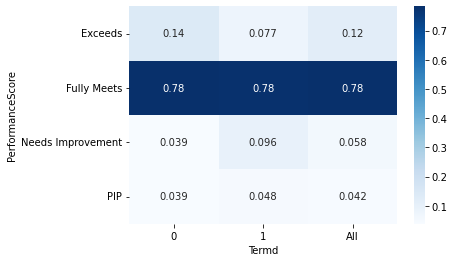

In [47]:
#Performance Score by Termination status
cross=pd.crosstab(data['PerformanceScore'],data['Termd'],normalize='columns',margins=True)
sns.heatmap(cross,annot=True,cmap='Blues')
plt.show()

A higher proportion of terminated employees had Needs Improvement or PIP performance scores compared to that of active employees, but there was a much smaller proportion of Exceeds.

### Logistic Regression: Predicting Termination Status (Termd)

#### Feature Selection:

The dataset above contains many features particularly categorical features. In order to develop a regression model that is interpretable and can be generalized to other data, careful feature selection must be applied so that only the most useful features are used. Feature selection for this logistic regression model will be based on the findings from the exploratory work above and whether it is reasonable to assume a potential connection with termination status.

In [48]:
#View of data
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,DaysatCompany
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,35,2796.0
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,43,444.0
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,30,447.0
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,30,4071.0
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,29,1884.0


The numerical features to be included in the model showed a significant average difference between terminated employees and active employees. These features are:

Salary

SpecialProjectsCount

DaysLateLast30

Absences

Age

DaysatCompany

Categorical features with greater than two values will need to be converted to dummy variables for use in regression. Values within these features that show significant differences by termination status may be included within the regression. Included categorical features:

MaritalDesc

CitizenDesc (US Citizen)

RaceDesc

Department

RecruitmentSource

PerformanceScore (Exceeds, Needs Improvement, PIP)

Despite containing several distinguishing values, the Position feature has been excluded from regression because it is redundant with the Department feature, which is an aggregation of the available positions. FromDiversityJobFairID was also removed because it is redundant with the RecruitmentSource value, Diversity Job Fair. MaritalDesc is chosen over MarriedID because it is more descriptive and also shows variation by termination status across all of its values, and therefore may produce a better model. Most other categorical features were excluded because they do not show significant differences by termination status or as in the case with State are likely trivial due to a lack of data. In the case of ManagerName, this is a feature that is likely to change frequently over time. If this model is intended to be used by a company consistantly or applicable in other work environments, then it cannot depend on a feature such as this. As a result, ManagerName was excluded from the model. Other redundant features that recoded versions of other catagorical features such as 'are also excluded.

In [49]:
#Setting up dataset of features
reg_data= data.loc[:,['Salary','SpecialProjectsCount','DaysLateLast30','Absences','Age','DaysatCompany','MaritalDesc','CitizenDesc','RaceDesc','Department','RecruitmentSource','PerformanceScore']].copy()
reg_data

,Salary,SpecialProjectsCount,DaysLateLast30,Absences,Age,DaysatCompany,MaritalDesc,CitizenDesc,RaceDesc,Department,RecruitmentSource,PerformanceScore
0,62506,0,0,1,35,2796.0,Single,US Citizen,White,Production,LinkedIn,Exceeds
1,104437,6,0,17,43,444.0,Married,US Citizen,White,IT/IS,Indeed,Fully Meets
2,64955,0,0,3,30,447.0,Married,US Citizen,White,Production,LinkedIn,Fully Meets
3,64991,0,0,15,30,4071.0,Married,US Citizen,White,Production,Indeed,Fully Meets
4,50825,0,0,2,29,1884.0,Divorced,US Citizen,White,Production,Google Search,Fully Meets
...,...,...,...,...,...,...,...,...,...,...,...,...
306,65893,0,0,13,33,1698.0,Single,US Citizen,White,Production,LinkedIn,Fully Meets
307,48513,0,5,4,36,2583.0,Single,US Citizen,Asian,Production,Google Search,PIP
308,220450,6,0,16,39,3247.0,Single,US Citizen,White,IT/IS,Employee Referral,Exceeds
309,89292,5,0,11,40,1432.0,Single,US Citizen,White,IT/IS,Employee Referral,Fully Meets


In [50]:
#Creating Dummy Variables
reg_data= pd.get_dummies(reg_data)

In [51]:
#Removing Features that showed little difference by termination status
reg_data.drop(['CitizenDesc_Eligible NonCitizen','CitizenDesc_Non-Citizen','PerformanceScore_Fully Meets'], axis=1, inplace=True)
reg_data

,Salary,SpecialProjectsCount,DaysLateLast30,Absences,Age,DaysatCompany,MaritalDesc_Divorced,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_Widowed,CitizenDesc_US Citizen,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White,Department_Admin Offices,Department_Executive Office,Department_IT/IS,Department_Production,Department_Sales,Department_Software Engineering,RecruitmentSource_CareerBuilder,RecruitmentSource_Diversity Job Fair,RecruitmentSource_Employee Referral,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Website,PerformanceScore_Exceeds,PerformanceScore_Needs Improvement,PerformanceScore_PIP
0,62506,0,0,1,35,2796.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,104437,6,0,17,43,444.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,64955,0,0,3,30,447.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,64991,0,0,15,30,4071.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,50825,0,0,2,29,1884.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,65893,0,0,13,33,1698.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
307,48513,0,5,4,36,2583.0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
308,220450,6,0,16,39,3247.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
309,89292,5,0,11,40,1432.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [52]:
#Scaling the data ranges to take values between 0 and 1
mm= MinMaxScaler()
scaled_data= mm.fit_transform(reg_data)
reg_data= pd.DataFrame(scaled_data, columns=reg_data.columns)
reg_data.head()

,Salary,SpecialProjectsCount,DaysLateLast30,Absences,Age,DaysatCompany,MaritalDesc_Divorced,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_Widowed,CitizenDesc_US Citizen,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White,Department_Admin Offices,Department_Executive Office,Department_IT/IS,Department_Production,Department_Sales,Department_Software Engineering,RecruitmentSource_CareerBuilder,RecruitmentSource_Diversity Job Fair,RecruitmentSource_Employee Referral,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Website,PerformanceScore_Exceeds,PerformanceScore_Needs Improvement,PerformanceScore_PIP
0,0.085190,0.00,0.0,0.000000,0.214286,0.580348,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.289777,0.75,0.0,0.842105,0.404762,0.087576,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.097139,0.00,0.0,0.105263,0.095238,0.088204,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.097315,0.00,0.0,0.736842,0.095238,0.847475,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.028197,0.00,0.0,0.052632,0.071429,0.389273,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Data Preparation:

In [53]:
#Setting up predictors and target features
X= reg_data
y= data['Termd']

In [54]:
#Splitting data into Training and Test Data
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=.2, random_state=45)

Termination status(Termd) is the target feature to be predicted by the model.

Termd = 0, Active Employee

Termd = 1, Terminated

The training-test split on the data is 80/20.

#### Logistic Regression:

In [55]:
#Fitting Logistic Regression model
#lgr= LogisticRegression(max_iter=500)
#parameters= {'penalty':['none','l2'], 'C':[.1,.3,.5,1,3], 'class_weight':[{0:.33, 1:.67},'balanced', None]}

#grids= GridSearchCV(estimator= lgr, cv=10, param_grid= parameters, scoring= 'roc_auc')
#grids.fit(X_train, y_train)
#print(grids.best_estimator_)

In [56]:
lgr= LogisticRegression(max_iter=500, penalty='l2', C=3, class_weight='balanced')
lgr= lgr.fit(X_train,y_train)

In [57]:
#Predicting termination status of test set
y_pred= lgr.predict(X_test)

#### Model Evaluation / Results:

In [58]:
#Model Evaluation Metrics
res= classification_report(y_test,y_pred,target_names=['Active','Terminated'])
print(res)

              precision    recall  f1-score   support

      Active       0.91      0.85      0.88        47
  Terminated       0.63      0.75      0.69        16

    accuracy                           0.83        63
   macro avg       0.77      0.80      0.78        63
weighted avg       0.84      0.83      0.83        63



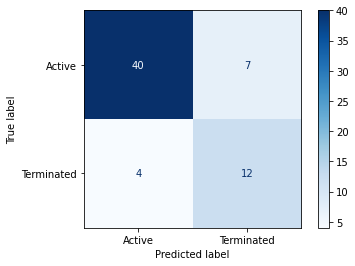

In [59]:
#Visualize Confusion matrix
plot_confusion_matrix(lgr,X_test,y_test,display_labels=['Active','Terminated'],cmap=plt.cm.Blues)
plt.show()

In [60]:
#Viewing most important model features
coef= lgr.coef_[0]
importance= pd.DataFrame(coef, index=(X.columns), columns=['Importance (Weight Coefficient)'])
np.abs(importance).sort_values('Importance (Weight Coefficient)', ascending=False)

,Importance (Weight Coefficient)
DaysatCompany,6.518226
MaritalDesc_Separated,1.311265
SpecialProjectsCount,1.145846
RecruitmentSource_Google Search,1.124872
RecruitmentSource_Website,1.107403
Department_Admin Offices,1.061116
RecruitmentSource_Employee Referral,0.918419
RecruitmentSource_LinkedIn,0.828274
RecruitmentSource_Diversity Job Fair,0.826946
RecruitmentSource_Indeed,0.813483


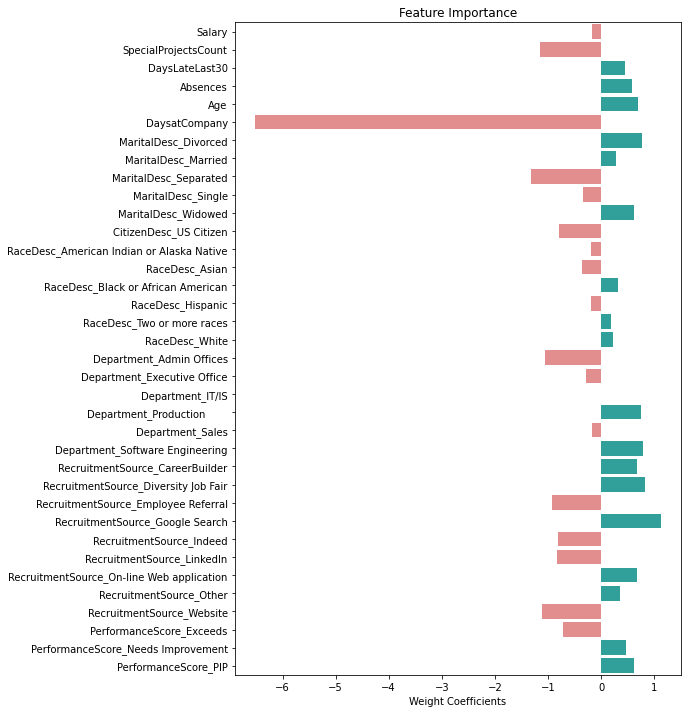

In [61]:
#Visualizing feature weights (importance)
clrs= ['lightcoral' if (x < 0) else 'lightseagreen' for x in coef]

plt.figure(figsize=(8,12))
sns.barplot(y=X.columns, x=coef, palette= clrs)
plt.title('Feature Importance')
plt.xlabel('Weight Coefficients')
plt.show()

#### Results: Logistic Regression

A logistic regression model using select features from the HR dataset was able to predict the termination status of test employee data with an overall accuracy of ~83%. However, the model's precision and recall classifying terminated employees were 63% and 75% respectively, indicating that its ability to correctly classify terminated employees was significantly worse than its ability to correctly classify active employees. This is not unexpected, however given that roughly two-thirds of the training data represented active employees. The purpose of this project was to develop a model capable of reliably identifying employees most likely to be terminated. The model was able to accomplish this task with some success, but its predictive ability could be better for terminated employees. Two possible contributing factors for the lower model performance for termination status are the class imbalance between active and terminated employees in the data and the overall limited amount of data. A future analysis would benefit from additional samples of terminated employees.

The features most useful to predicting termination status in this model are Days at Company, MaritalDesc_Separated, Special Projects Count, RecruitmentSource_Google Search, RecruitmentSource_Website, and Department_Admin Offices. A longer tenure at the company, being separated from one's spouse, more special projects, working in the administrative offices, and having been recruited through the company website were associated with active employees. Being recruited to the company through google was the only feature amongst the most important in this model associated more strongly with terminated employees. Alternate models will be applied to this data to see if greater classification performance can be achieved.

### Decision Tree Classifier

In [62]:
#Identifying hyperparameters using GridSearchCV
#dt= DecisionTreeClassifier()
#parameters= {'max_depth': list(range(1,41))}

#grid_dt= GridSearchCV(dt,cv=10,param_grid= parameters, scoring='roc_auc')
#grid_dt.fit(X_train,y_train)
#print(grid_dt.best_estimator_)

In [63]:
#Setting up decision tree classifier
dt= DecisionTreeClassifier(max_depth=5, random_state=27)
dt.fit(X_train,y_train)

y_pred= dt.predict(X_test)

In [64]:
#Model Evaluation Metrics
res= classification_report(y_test,y_pred,target_names=['Active','Terminated'])
print(res)

              precision    recall  f1-score   support

      Active       0.86      0.91      0.89        47
  Terminated       0.69      0.56      0.62        16

    accuracy                           0.83        63
   macro avg       0.78      0.74      0.75        63
weighted avg       0.82      0.83      0.82        63



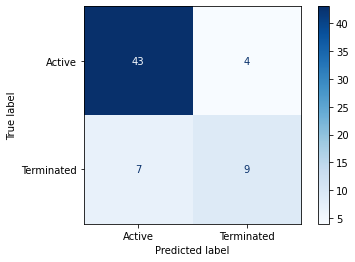

In [65]:
#Visualize Confusion matrix
plot_confusion_matrix(dt,X_test,y_test,display_labels=['Active','Terminated'],cmap=plt.cm.Blues)
plt.show()

In [66]:
#Feature importance in Decision Tree (GINI)
print(pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False))

DaysatCompany                                0.515153
Salary                                       0.127876
DaysLateLast30                               0.094217
Age                                          0.087169
RecruitmentSource_Diversity Job Fair         0.047253
Department_Production                        0.029997
RaceDesc_Black or African American           0.022608
Department_Sales                             0.021195
RecruitmentSource_Indeed                     0.020468
SpecialProjectsCount                         0.012717
Absences                                     0.011809
MaritalDesc_Married                          0.009538
PerformanceScore_Needs Improvement           0.000000
PerformanceScore_Exceeds                     0.000000
RecruitmentSource_Website                    0.000000
RecruitmentSource_Other                      0.000000
RecruitmentSource_LinkedIn                   0.000000
RecruitmentSource_Google Search              0.000000
RecruitmentSource_Employee R

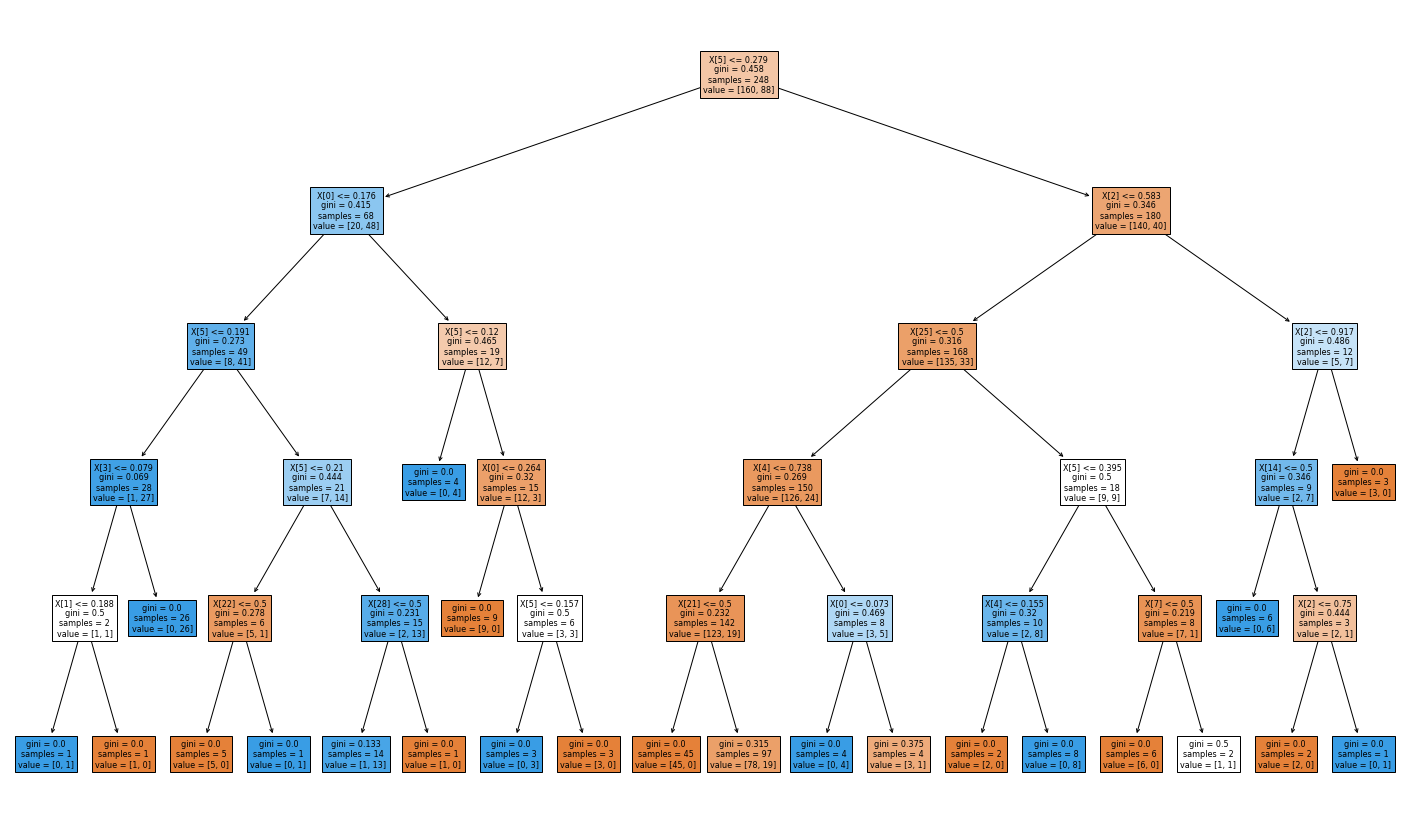

In [67]:
#Visualizing Decision Tree
plt.figure(figsize=(25,15))
plot_tree(dt,filled=True)
plt.show()

#### Results: Decision Tree

The decision tree model achieved about the same classification accuracy as the logistic regression model at 83%. It also showed some improvement in precision, but much lower recall at 69% and 56%, respectively. The primary task of this model is to identify which employees are likely to be terminated, so the model's ability to correctly classify active employees is less important than the ability to correctly classify terminated employees. As a result, recall is a more useful metric to compare model effectiveness than precision and accuracy, but the best model should balance all of these metrics. Based on this criteria, the decision tree model is a less successful classifier than the logistic regression model due to the significant drop in recall.

### Support Vector Classifer (SVC)

In [68]:
#svc= SVC(kernel='linear')

#kernel= ['linear','rbf','poly']
#parameters= dict(kernel=kernel)

#gridSVC= GridSearchCV(svc,cv=10,param_grid=parameters,scoring='roc_auc')
#gridSVC.fit(X_train,y_train)
#print(gridSVC.best_estimator_)

In [69]:
#svc= SVC(kernel='linear')

#w=[{0:.33, 1:.67},'balanced', None]
#parameters= dict(class_weight=w)

#gridSVC= GridSearchCV(svc,cv=10,param_grid=parameters,scoring='roc_auc')
#gridSVC.fit(X_train,y_train)
#print(gridSVC.best_estimator_)

In [70]:
#svc= SVC(kernel='linear',class_weight='balanced')

#c= np.logspace(-2,5,8)
#g= ['scale', 'auto',.001,.01,.1,1,10,100,1000]
#parameters= dict(C=c,gamma=g)

#gridSVC= GridSearchCV(svc,cv=10,param_grid=parameters,scoring='roc_auc')
#gridSVC.fit(X_train,y_train)
#print(gridSVC.best_estimator_)

In [71]:
svc= SVC(kernel='linear',class_weight='balanced', C=1, gamma='scale')
svc.fit(X_train,y_train)

y_pred= svc.predict(X_test)

In [72]:
#Model Evaluation Metrics
res= classification_report(y_test,y_pred,target_names=['Active','Terminated'])
print(res)

              precision    recall  f1-score   support

      Active       0.93      0.85      0.89        47
  Terminated       0.65      0.81      0.72        16

    accuracy                           0.84        63
   macro avg       0.79      0.83      0.81        63
weighted avg       0.86      0.84      0.85        63



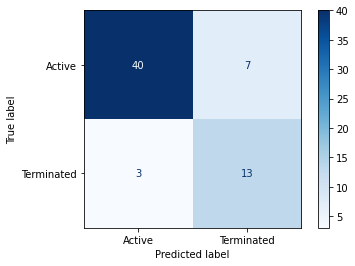

In [73]:
#Visualize Confusion matrix
plot_confusion_matrix(svc,X_test,y_test,display_labels=['Active','Terminated'],cmap=plt.cm.Blues)
plt.show()

#### Results: Support Vector Classifier

The support vector classifier model using a linear kernel achieved a classification accuracy of 84%, an improvement on the earlier models. Its performance also exceeded the logistic regression model in precision. 65% of the test data that the model classified as terminated was correctly classified. The most significant improvement over the logistic regression model was recall. The SVC model correctly classified 81% of all terminated employees in the test data. The SVC model has achieved the best performance of any model at classifying termination status.

### K Nearest Neighbors Classifier

In [74]:
#knn= KNeighborsClassifier()
#parameters= {'n_neighbors':list(range(1,11)), 'weights':['uniform','distance']}

#gridKnn= GridSearchCV(knn, cv=10,param_grid=parameters,scoring='roc_auc')
#gridKnn.fit(X_train,y_train)
#print(gridKnn.best_estimator_)

In [75]:
knn= KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

y_pred= knn.predict(X_test)

In [76]:
#Model Evaluation Metrics
res= classification_report(y_test,y_pred,target_names=['Active','Terminated'])
print(res)

              precision    recall  f1-score   support

      Active       0.77      0.94      0.85        47
  Terminated       0.50      0.19      0.27        16

    accuracy                           0.75        63
   macro avg       0.64      0.56      0.56        63
weighted avg       0.70      0.75      0.70        63



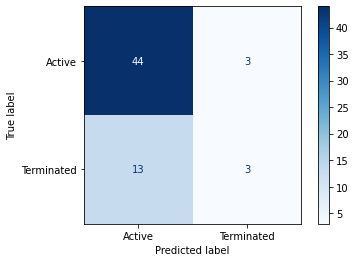

In [77]:
#Visualize Confusion matrix
plot_confusion_matrix(knn,X_test,y_test,display_labels=['Active','Terminated'],cmap=plt.cm.Blues)
plt.show()

#### Results: K Nearest Neighbor Classifier

The kNN model had the worst performance of all models in regard to accuracy, precision, and recall. It was able to classify 75% of the test data accurately, but precision and recall for termination were particularly bad. This low performance may be a result of the class imbalance in the data, limited training data, or there may simply not be enough distinguishing information in the data between the two class. No matter the case, this classification method does not appear to be useful for this task.

### Conclusion

The task of this project was to develop a classification model capable of classifying the termination status of employees using a human resources dataset. Particularly of interest is the ability to predict which employees are likely to be terminated. Of the several models evaluated, the SVC model achieved the most success at this task, correctly classifying 81% of the terminated employees in the test data with an 84% overall accuracy. Based on the data exploration and results from the models, the number of days employed at the company, the number of days late, the number of special projects, martial status, department, and recruitment source appear to have the most significance in identifying termination status. Longer tenure at the job, more special projects, and working in the administrative office, and being single or separated associated more strongly with active employees. A greater number of late days, being married or divorced, and being recruited from Google, Careerbuilder, the diversity job fair, or the online web application associated with an employee's termination.